In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

2024-06-27 20:36:44.159484: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 20:36:44.164196: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 20:36:44.236206: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 20:36:46.095479: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plotar perda
    ax1.plot(history.history['loss'], label='Perda de treino')
    ax1.plot(history.history['val_loss'], label='Perda de validação')
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Perda')
    ax1.set_title('Perda durante o Treinamento e Validação')
    ax1.legend()

    # Plotar acurácia
    ax2.plot(history.history['accuracy'], label='Acurácia de treino')
    ax2.plot(history.history['val_accuracy'], label='Acurácia de validação')
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Acurácia')
    ax2.set_title('Acurácia durante o Treinamento e Validação')
    ax2.legend()

    plt.show()


In [16]:
dataset = sklearn.datasets.fetch_olivetti_faces(data_home="/home/talvani/TP-RNA/olivetti",shuffle=True)
print(dataset.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [17]:
X = np.array(dataset.images)
Y = np.array(dataset.target)
x = X
y = Y

if X.ndim == 3 and X.shape[1] == 64 and X.shape[2] == 64:
    X = X.reshape(X.shape[0], -1)

lda = LinearDiscriminantAnalysis()
x_train_lda,x_test_lda,y_train_lda,y_test_lda = train_test_split(X,Y, test_size=0.2, random_state=42)
x_train_lda, x_val_lda, y_train_lda, y_val_lda = train_test_split(x_train_lda, y_train_lda, test_size=0.25, random_state=88)  # 0.25 * 0.8 = 0.2
lda.fit(x_train_lda, y_train_lda)

LinearDiscriminantAnalysis()

In [30]:
x= np.array(dataset.images)
y= dataset.target


if x.ndim == 3 and x.shape[1] == 64 and x.shape[2] == 64:
    x = x.reshape(x.shape[0], -1)


x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=88)  # 0.25 * 0.8 = 0.2

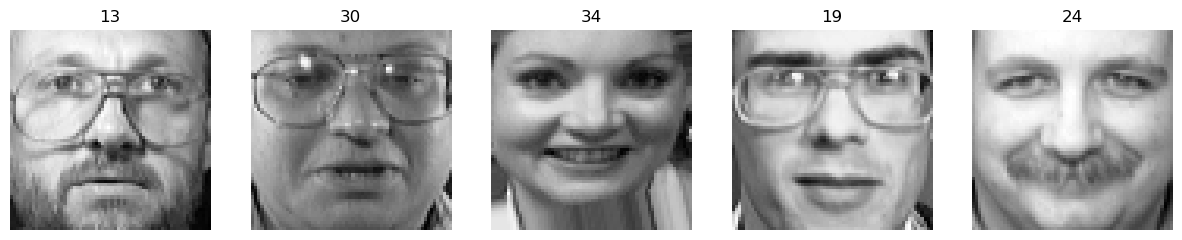

In [46]:
images = dataset.images
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(0,5):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(dataset.target[i]))

In [20]:
print(np.shape(x_train),np.shape(x_test),np.shape(x_val))

(240, 64, 64) (80, 64, 64) (80, 64, 64)


In [21]:
print(np.shape(x_train_lda),np.shape(x_test_lda),np.shape(x_val_lda))

(240, 4096) (80, 4096) (80, 4096)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.0076 - loss: 4.7773 - val_accuracy: 0.0875 - val_loss: 3.9309
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.0958 - loss: 3.9367 - val_accuracy: 0.0500 - val_loss: 3.7637
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0567 - loss: 3.6363 - val_accuracy: 0.0375 - val_loss: 3.7248
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1045 - loss: 3.5843 - val_accuracy: 0.0250 - val_loss: 3.7305
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1023 - loss: 3.5132 - val_accuracy: 0.0125 - val_loss: 3.5876
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0858 - loss: 3.3872 - val_accuracy: 0.1125 - val_loss: 3.5439
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1505 - loss: 3.3085 - val_accuracy: 0.0750 - val_loss: 3.5254
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2957 - loss: 3.2016 - val_accuracy: 0.1500 - val_loss:

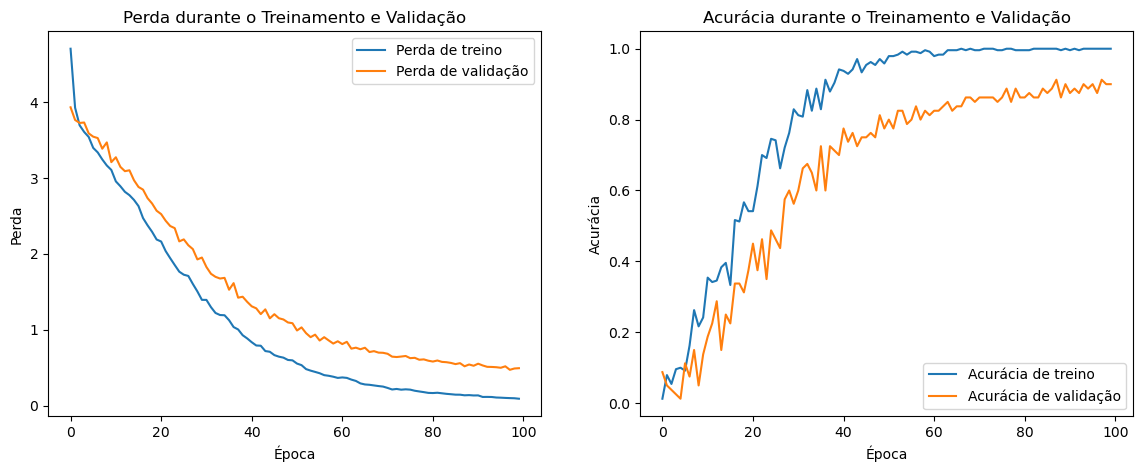

3/3 - 0s - 19ms/step - accuracy: 0.8625 - loss: 0.5941
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.0506 - loss: 4.8504 - val_accuracy: 0.0375 - val_loss: 4.2055
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0324 - loss: 4.1394 - val_accuracy: 0.0375 - val_loss: 3.7752
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0300 - loss: 3.7619 - val_accuracy: 0.0750 - val_loss: 3.6069
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0771 - loss: 3.5427 - val_accuracy: 0.0250 - val_loss: 3.5843
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0826 - loss: 3.5287 - val_accuracy: 0.1500 - val_loss: 3.5263
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0925 - loss: 3.4575 - val_accuracy: 0.1125 - val_loss: 3.5630
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1234 - loss: 3.4092 - val_accuracy: 0.0375 - val_loss: 3.5483
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0

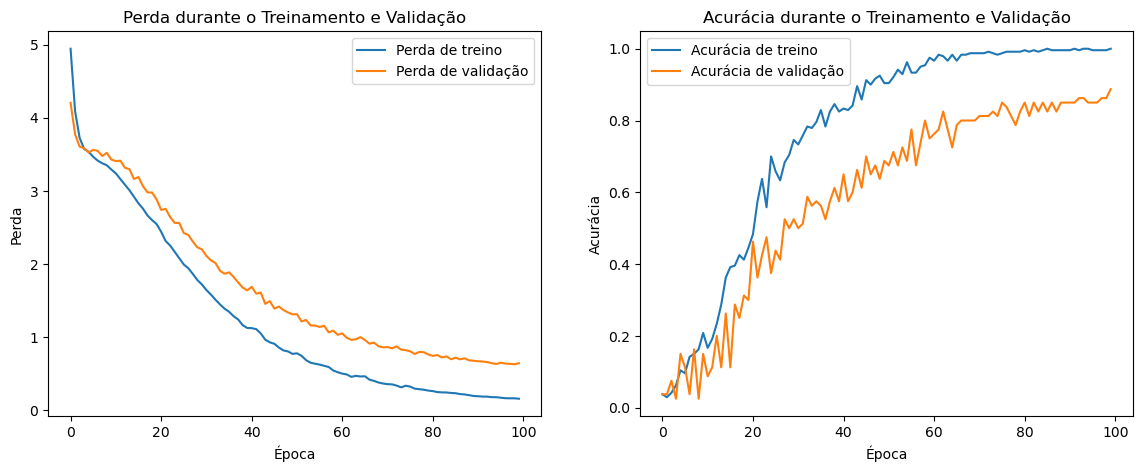

3/3 - 0s - 16ms/step - accuracy: 0.8500 - loss: 0.6388
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.0361 - loss: 4.8803 - val_accuracy: 0.0125 - val_loss: 4.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0528 - loss: 3.8449 - val_accuracy: 0.0250 - val_loss: 3.6128
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0645 - loss: 3.5957 - val_accuracy: 0.0125 - val_loss: 3.6537
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0599 - loss: 3.5847 - val_accuracy: 0.0375 - val_loss: 3.6152
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0987 - loss: 3.5435 - val_accuracy: 0.0500 - val_loss: 3.5924
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0810 - loss: 3.5159 - val_accuracy: 0.0875 - val_loss: 3.5555
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1317 - loss: 3.4400 - val_accuracy: 0.0625 - val_loss: 3.5379
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0

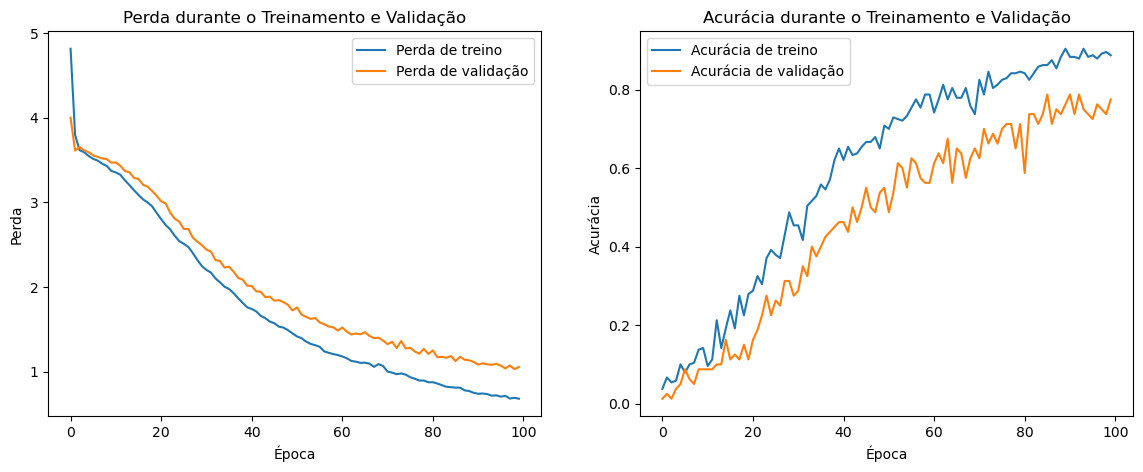

3/3 - 0s - 18ms/step - accuracy: 0.6750 - loss: 1.1797
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0367 - loss: 4.8068 - val_accuracy: 0.0500 - val_loss: 4.2173
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0461 - loss: 3.9029 - val_accuracy: 0.0375 - val_loss: 3.8038
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0568 - loss: 3.6355 - val_accuracy: 0.0250 - val_loss: 3.5330
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0708 - loss: 3.4622 - val_accuracy: 0.1000 - val_loss: 3.5585
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1640 - loss: 3.4087 - val_accuracy: 0.0250 - val_loss: 3.4207
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1517 - loss: 3.3244 - val_accuracy: 0.1250 - val_loss: 3.4004
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2931 - loss: 3.1912 - val_accuracy: 0.1750 - val_loss: 3.2465
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0

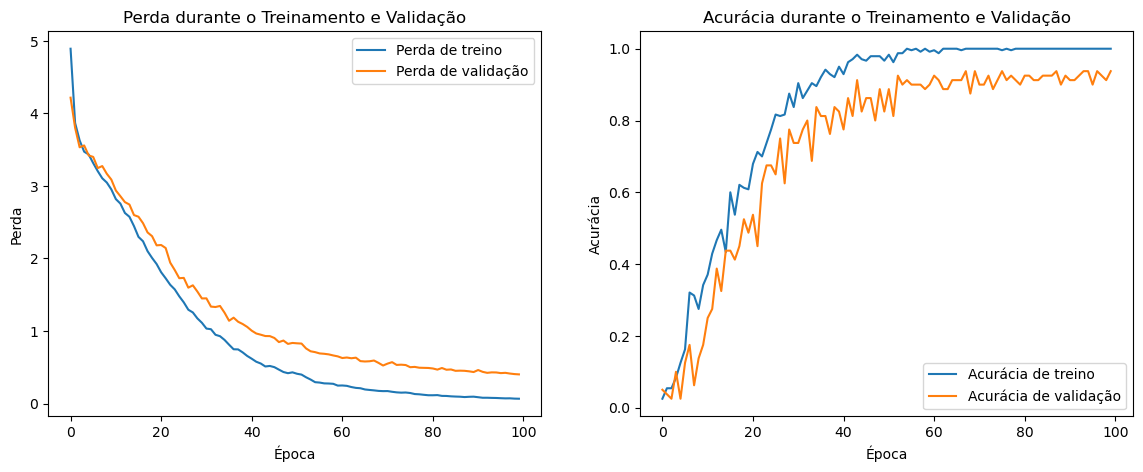

3/3 - 0s - 24ms/step - accuracy: 0.9125 - loss: 0.4571
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0390 - loss: 4.7663 - val_accuracy: 0.0375 - val_loss: 4.3925
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0667 - loss: 4.0200 - val_accuracy: 0.0375 - val_loss: 3.9139
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0567 - loss: 3.6223 - val_accuracy: 0.0875 - val_loss: 3.6644
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1094 - loss: 3.5013 - val_accuracy: 0.0750 - val_loss: 3.5178
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1304 - loss: 3.3630 - val_accuracy: 0.0750 - val_loss: 3.4124
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1418 - loss: 3.3109 - val_accuracy: 0.0750 - val_loss: 3.3930
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1869 - loss: 3.1963 - val_accuracy: 0.1750 - val_loss: 3.3567
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0

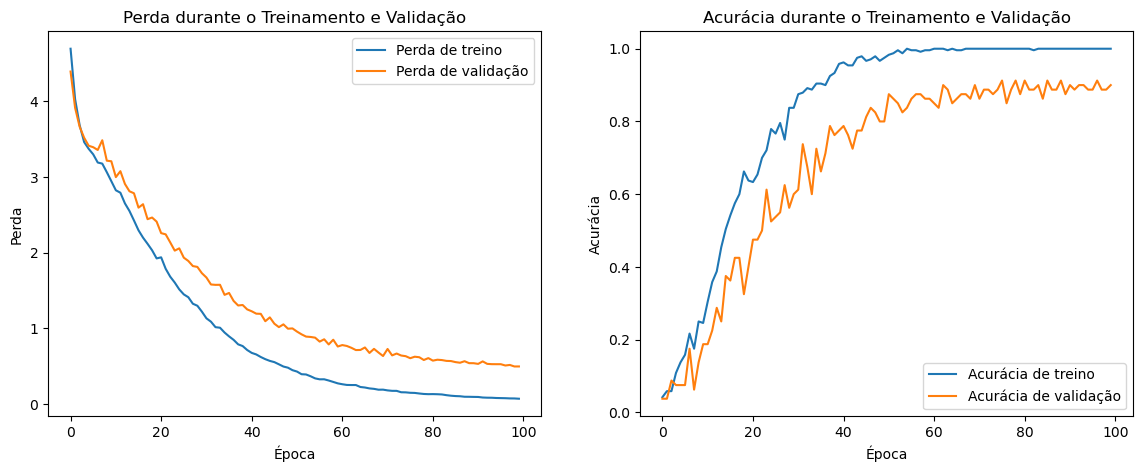

3/3 - 0s - 22ms/step - accuracy: 0.8875 - loss: 0.5629


In [43]:

LDA_results = []

for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(40)
    ])

    model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

    history = model.fit(x_train_lda, y_train_lda, epochs=100, validation_data=(x_val_lda,y_val_lda))

    plot_history(history)
    test_loss, test_acc = model.evaluate(x_test_lda, y_test_lda, verbose=2)

    LDA_results.append((test_acc,test_loss))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0154 - loss: 4.8999 - val_accuracy: 0.0250 - val_loss: 4.3190
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0165 - loss: 4.1469 - val_accuracy: 0.0375 - val_loss: 3.9065
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0652 - loss: 3.6949 - val_accuracy: 0.1000 - val_loss: 3.6227
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.0912 - loss: 3.5312 - val_accuracy: 0.0125 - val_loss: 3.6017
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1288 - loss: 3.4450 - val_accuracy: 0.0625 - val_loss: 3.4962
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1017 - loss: 3.4088 - val_accuracy: 0.0625 - val_loss: 3.5333
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1217 - loss: 3.3540 - val_accuracy: 0.0625 - val_loss: 3.4229
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0735 - loss: 3.2932 - val_accuracy: 0.0625 - val_loss:

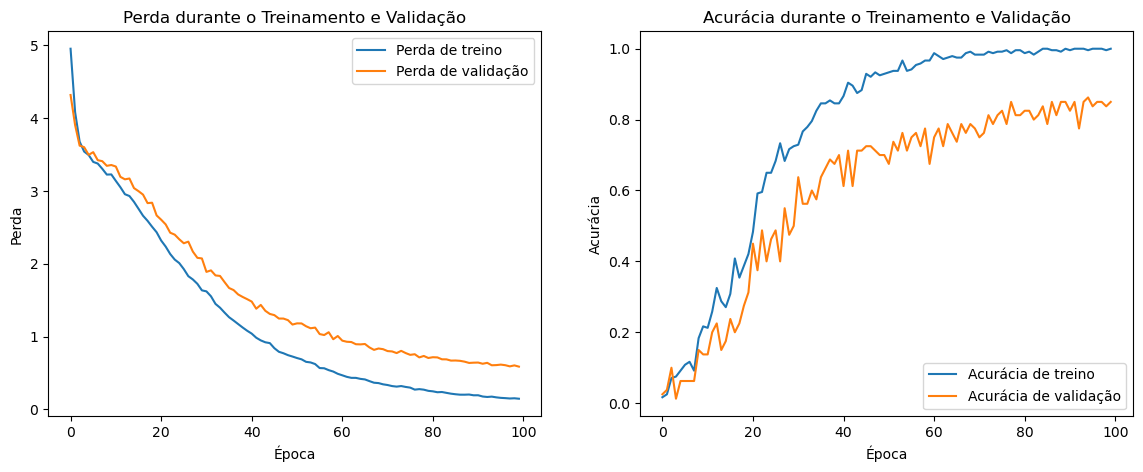

3/3 - 0s - 11ms/step - accuracy: 0.8750 - loss: 0.6782
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.0298 - loss: 5.0704 - val_accuracy: 0.0375 - val_loss: 4.1094
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0407 - loss: 4.2461 - val_accuracy: 0.0625 - val_loss: 3.9976
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0929 - loss: 3.8637 - val_accuracy: 0.0125 - val_loss: 3.7004
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1016 - loss: 3.4566 - val_accuracy: 0.0250 - val_loss: 3.4904
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0535 - loss: 3.3685 - val_accuracy: 0.1125 - val_loss: 3.5420
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1795 - loss: 3.2867 - val_accuracy: 0.1375 - val_loss: 3.3845
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2723 - loss: 3.1185 - val_accuracy: 0.1875 - val_loss: 3.3554
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0

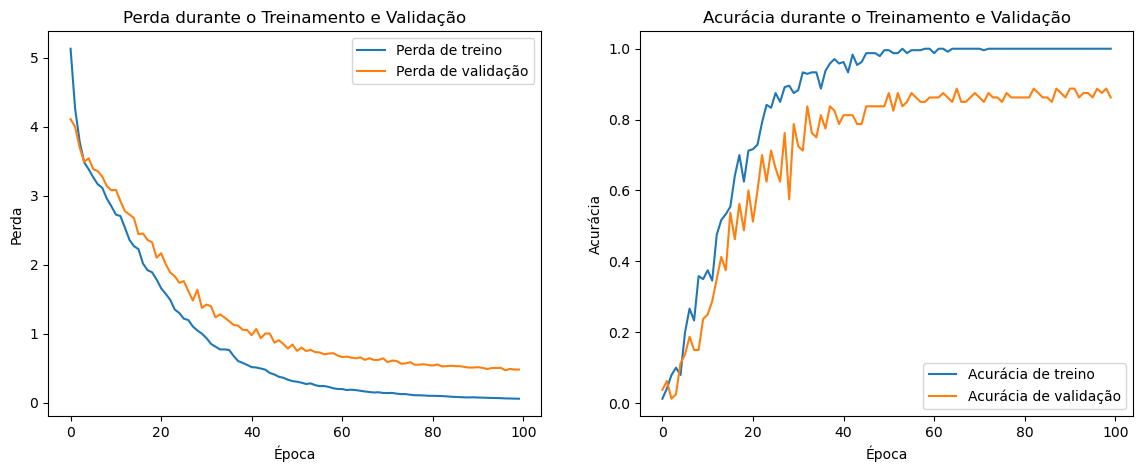

3/3 - 0s - 21ms/step - accuracy: 0.8625 - loss: 0.4590
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.0338 - loss: 5.0694 - val_accuracy: 0.0375 - val_loss: 4.3403
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0446 - loss: 4.2413 - val_accuracy: 0.0750 - val_loss: 3.9497
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0728 - loss: 3.8253 - val_accuracy: 0.0250 - val_loss: 3.5912
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0527 - loss: 3.5217 - val_accuracy: 0.1250 - val_loss: 3.4933
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1300 - loss: 3.4408 - val_accuracy: 0.0625 - val_loss: 3.5482
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1539 - loss: 3.3718 - val_accuracy: 0.1125 - val_loss: 3.4449
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1538 - loss: 3.3495 - val_accuracy: 0.0125 - val_loss: 3.4572
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0

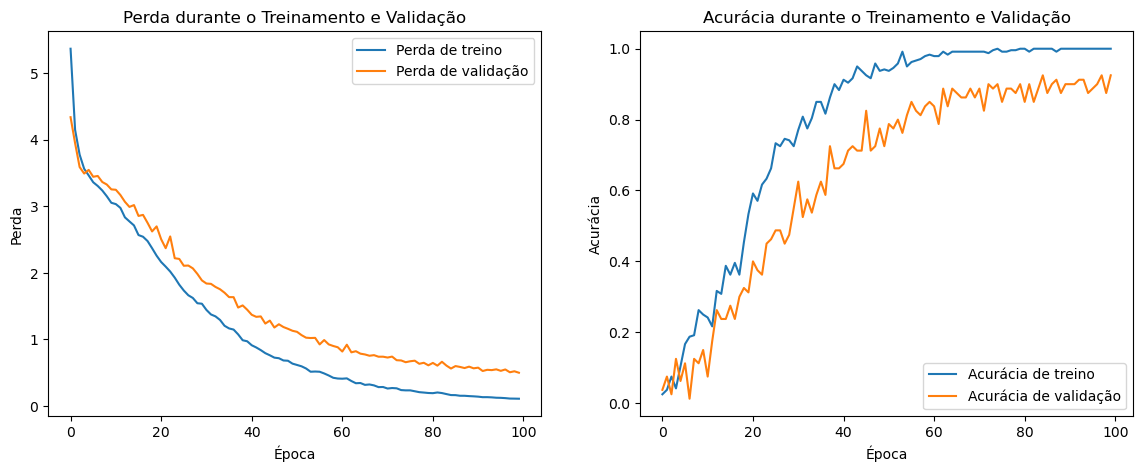

3/3 - 0s - 10ms/step - accuracy: 0.8750 - loss: 0.5437
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.0130 - loss: 5.1828 - val_accuracy: 0.0250 - val_loss: 3.9525
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0289 - loss: 3.9954 - val_accuracy: 0.0250 - val_loss: 3.7357
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0316 - loss: 3.6805 - val_accuracy: 0.0375 - val_loss: 3.6801
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0742 - loss: 3.5603 - val_accuracy: 0.0625 - val_loss: 3.6796
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0724 - loss: 3.5502 - val_accuracy: 0.0500 - val_loss: 3.6357
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0873 - loss: 3.4837 - val_accuracy: 0.0750 - val_loss: 3.5743
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1574 - loss: 3.3822 - val_accuracy: 0.0875 - val_loss: 3.5549
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0

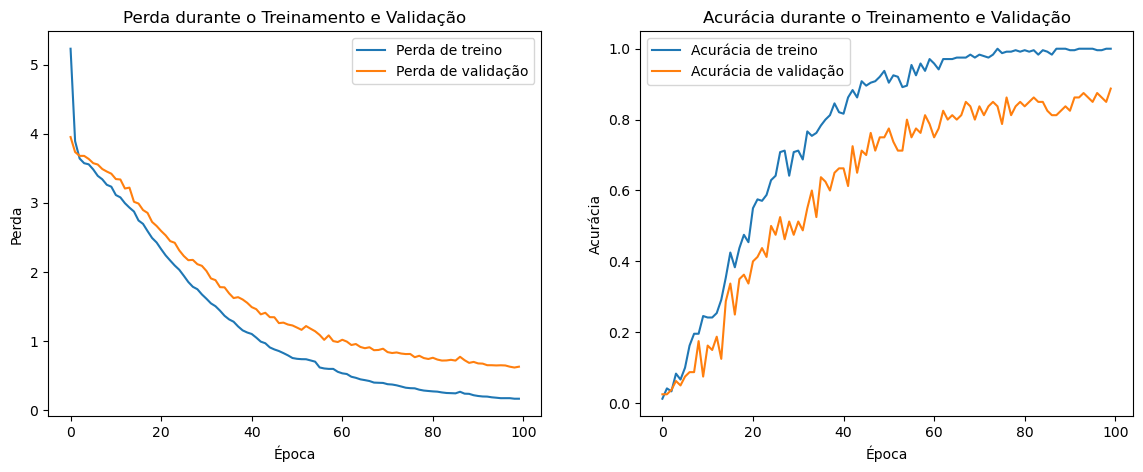

3/3 - 0s - 20ms/step - accuracy: 0.8500 - loss: 0.7138
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.0119 - loss: 5.0923 - val_accuracy: 0.0250 - val_loss: 4.2769
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0558 - loss: 3.9861 - val_accuracy: 0.0000e+00 - val_loss: 3.7453
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0512 - loss: 3.6330 - val_accuracy: 0.0375 - val_loss: 3.6268
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0819 - loss: 3.5821 - val_accuracy: 0.0125 - val_loss: 3.6383
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0626 - loss: 3.5441 - val_accuracy: 0.0625 - val_loss: 3.5821
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1002 - loss: 3.5021 - val_accuracy: 0.0625 - val_loss: 3.5773
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0840 - loss: 3.4622 - val_accuracy: 0.0875 - val_loss: 3.5470
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accurac

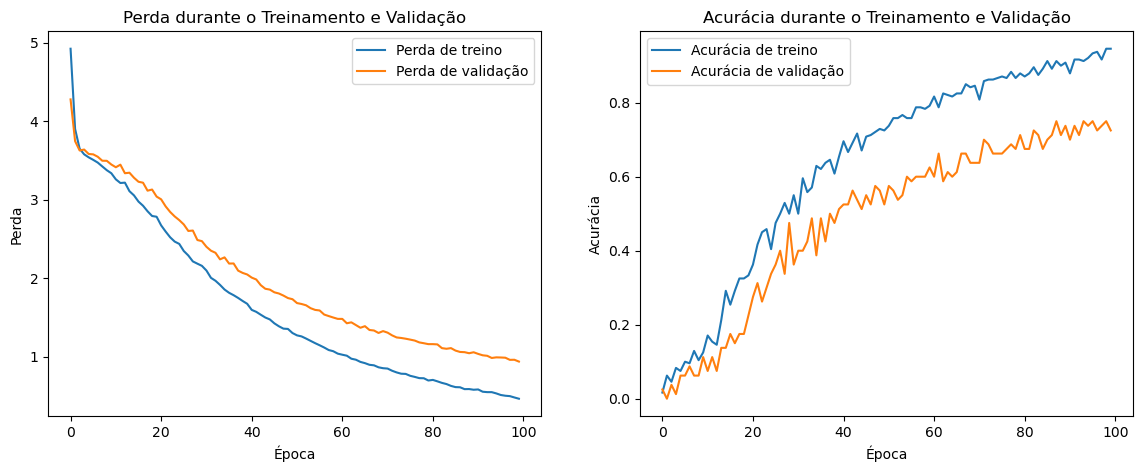

3/3 - 0s - 20ms/step - accuracy: 0.7000 - loss: 1.0378


In [44]:

no_LDA_results = []



for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(40)
    ])

    model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val))

    plot_history(history)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

    no_LDA_results.append((test_acc,test_loss))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.0229 - loss: 4.3336 - val_accuracy: 0.0375 - val_loss: 3.8849
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0265 - loss: 3.7997 - val_accuracy: 0.0375 - val_loss: 3.7761
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0185 - loss: 3.6739 - val_accuracy: 0.0000e+00 - val_loss: 3.7417
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0851 - loss: 3.5770 - val_accuracy: 0.0500 - val_loss: 3.6145
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0953 - loss: 3.5027 - val_accuracy: 0.0375 - val_loss: 3.5754
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0903 - loss: 3.4228 - val_accuracy: 0.0875 - val_loss: 3.5876
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1736 - loss: 3.3546 - val_accuracy: 0.1500 - val_loss: 3.4364
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1822 - loss: 3.2836 - val_accuracy: 0.1000 - val_

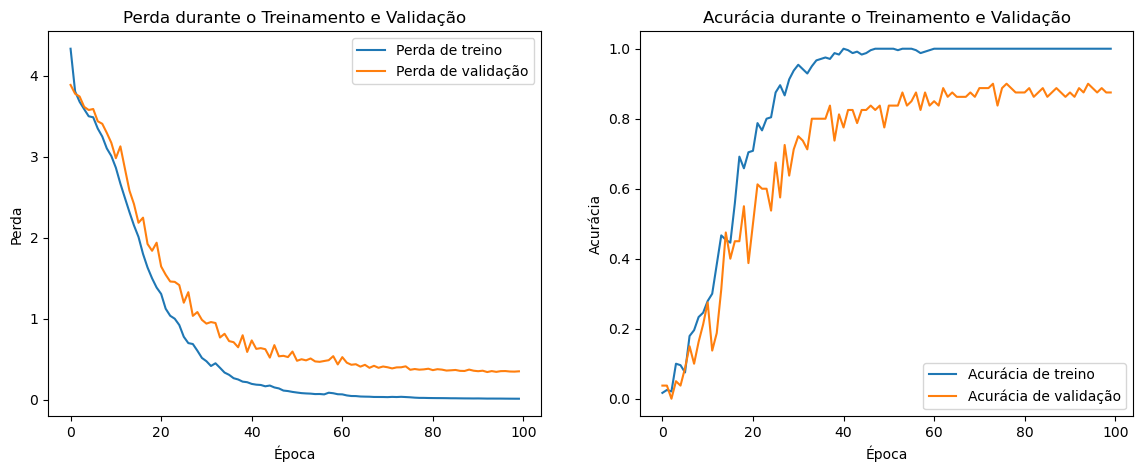

3/3 - 0s - 44ms/step - accuracy: 0.8875 - loss: 0.4703
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.0197 - loss: 4.1681 - val_accuracy: 0.0375 - val_loss: 3.7490
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0160 - loss: 3.7281 - val_accuracy: 0.0000e+00 - val_loss: 3.7183
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0469 - loss: 3.6763 - val_accuracy: 0.0125 - val_loss: 3.6639
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0643 - loss: 3.5650 - val_accuracy: 0.0750 - val_loss: 3.5946
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0992 - loss: 3.4632 - val_accuracy: 0.1250 - val_loss: 3.5594
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1527 - loss: 3.3866 - val_accuracy: 0.0125 - val_loss: 3.5901
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1665 - loss: 3.3358 - val_accuracy: 0.1000 - val_loss: 3.3818
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accurac

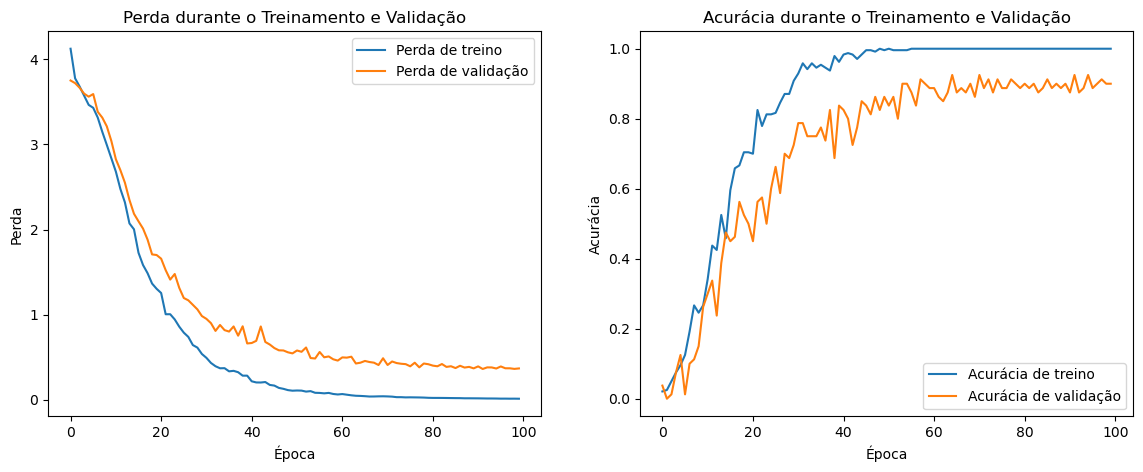

3/3 - 0s - 21ms/step - accuracy: 0.8625 - loss: 0.6919
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.0385 - loss: 4.2325 - val_accuracy: 0.0250 - val_loss: 4.0796
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0352 - loss: 3.8558 - val_accuracy: 0.0125 - val_loss: 3.7605
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0455 - loss: 3.7257 - val_accuracy: 0.0375 - val_loss: 3.7406
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0580 - loss: 3.6148 - val_accuracy: 0.1375 - val_loss: 3.6483
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0879 - loss: 3.5481 - val_accuracy: 0.0250 - val_loss: 3.7033
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1019 - loss: 3.4343 - val_accuracy: 0.1500 - val_loss: 3.4558
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2331 - loss: 3.2830 - val_accuracy: 0.0875 - val_loss: 3.4781
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0

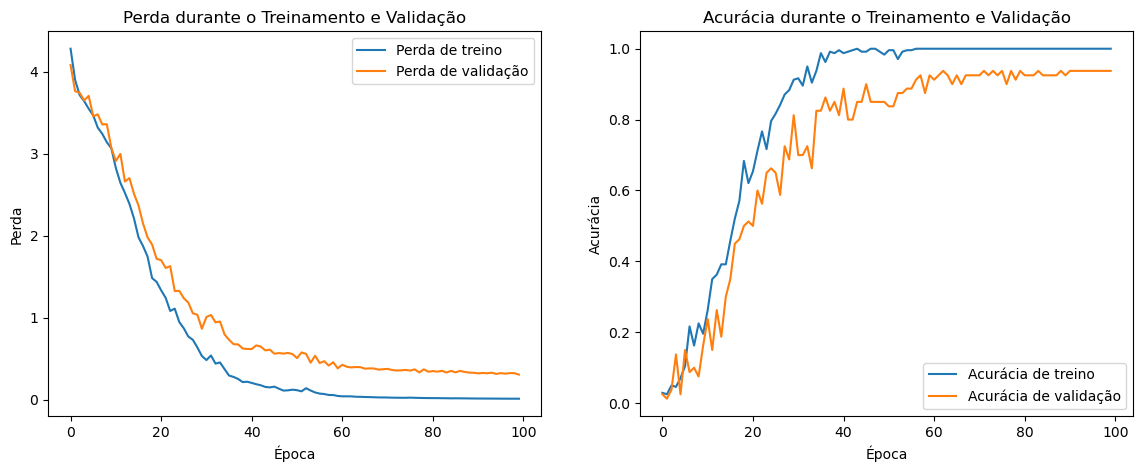

3/3 - 0s - 19ms/step - accuracy: 0.9375 - loss: 0.4046
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.0571 - loss: 4.0186 - val_accuracy: 0.0000e+00 - val_loss: 3.7841
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0354 - loss: 3.7731 - val_accuracy: 0.0500 - val_loss: 3.6508
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0301 - loss: 3.6427 - val_accuracy: 0.0625 - val_loss: 3.6211
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0929 - loss: 3.5345 - val_accuracy: 0.0125 - val_loss: 3.7295
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0982 - loss: 3.4610 - val_accuracy: 0.1000 - val_loss: 3.5226
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1318 - loss: 3.3836 - val_accuracy: 0.1500 - val_loss: 3.4794
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1810 - loss: 3.2711 - val_accuracy: 0.0500 - val_loss: 3.4422
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accurac

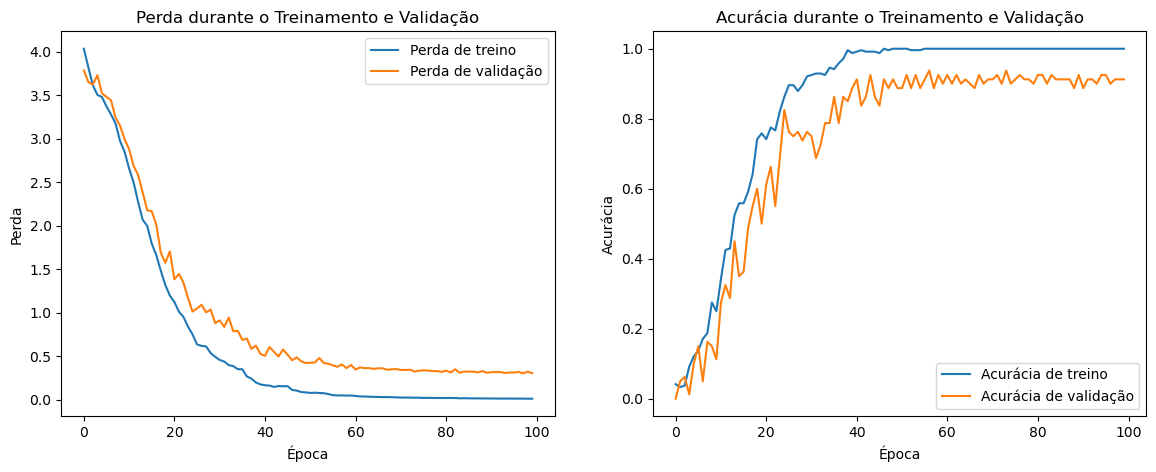

3/3 - 0s - 19ms/step - accuracy: 0.8875 - loss: 0.5845
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.0428 - loss: 4.2003 - val_accuracy: 0.0375 - val_loss: 4.0004
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0439 - loss: 3.8792 - val_accuracy: 0.0250 - val_loss: 3.8316
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0385 - loss: 3.7364 - val_accuracy: 0.0625 - val_loss: 3.6438
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0905 - loss: 3.5981 - val_accuracy: 0.0625 - val_loss: 3.6569
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0843 - loss: 3.4961 - val_accuracy: 0.0500 - val_loss: 3.6319
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1266 - loss: 3.4062 - val_accuracy: 0.0625 - val_loss: 3.6100
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.1146 - loss: 3.3894 - val_accuracy: 0.0875 - val_loss: 3.5374
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0

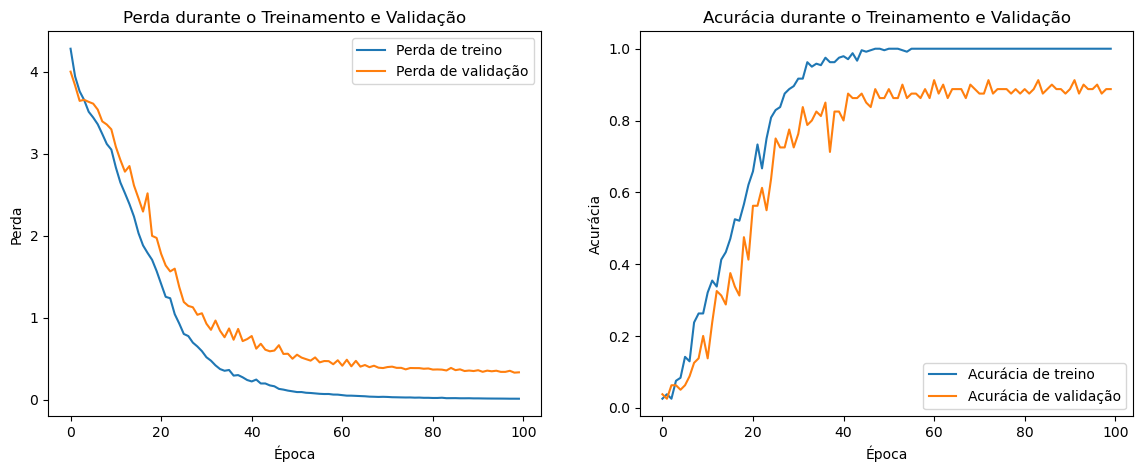

3/3 - 0s - 16ms/step - accuracy: 0.9000 - loss: 0.4695


In [48]:

layers_2_256_no_LDA = []



for i in range(5):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(40)
    ])

    model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val))

    plot_history(history)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

    layers_2_256_no_LDA.append((test_acc,test_loss))


In [49]:
sum_LDA = 0
sum_no_LDA = 0
sum_2layers = 0


for i in range(len(LDA_results)):
    sum_LDA += LDA_results[i][0]
    sum_no_LDA += no_LDA_results[i][0]
    sum_2layers += layers_2_256_no_LDA[i][0]

mean_LDA = sum_LDA/len(LDA_results)
mean_no_LDA = sum_no_LDA/len(LDA_results)
mean_2layers = sum_2layers/len(LDA_results)
print("LDA precision mean:",mean_LDA)
print("no LDA precision mean:",mean_no_LDA)
print("2 layers of 265 neurons:",mean_2layers)

LDA precision mean: 0.8375000119209289
no LDA precision mean: 0.8325000047683716
2 layers of 265 neurons: 0.8949999928474426


10
10


TypeError: Invalid shape (4096,) for image data

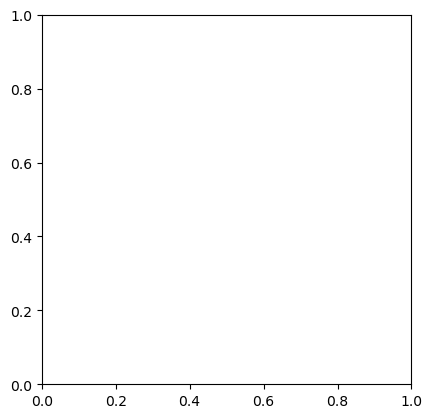

In [45]:
print(np.argmax(model(x_train)[0]))
print(y_train[0])
plt.imshow(x_train[0])

TypeError: Invalid shape (4096,) for image data

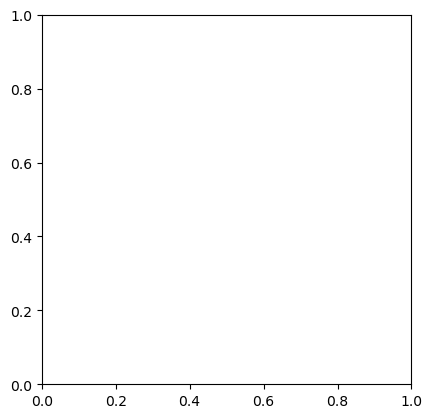

In [46]:
x_test = np.array(x_test)
y_test = np.array(y_test)

predicts = model(x_test)




for i in range(0,len(x_test)):
    predicted_class = np.argmax(predicts[i])
    confidence = np.max(predicts[i])
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})\n True Value: {y_test[i]}")
    plt.show()